<a href="https://colab.research.google.com/github/ganesh46/AI-LAB/blob/master/Linear_regression_on_Inter_and_B_tech_percentages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5a) Prediction
Consider a data set and perform univariate linear regression and find the coefficients. Show the relation between independent variable and dependent variable using scatter plot. 
Show the performance of the model using R-Square error, mean absolute error and Mean Square error.


# Predict the B.Tech Percentage of a student based on his Intermediate percentage using univariate linear regression .

In [ ]:
# Import the required packages
import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn.linear_model import LinearRegression # for using the model
from sklearn import metrics
import matplotlib.pyplot as plt # for plotting

## 1) Upload the data

In [ ]:
# Get the data in python environment
stu_data=pd.read_csv("students_placement_data.csv")

In [ ]:
stu_data.head()

,Roll No,Gender,Section,SSC Percentage,inter_Diploma_percentage,B.Tech_percentage,Backlogs,registered_for_ Placement_Training,placement status
0,1,M,A,87.3,65.3,40.00,18,NO,Not placed
1,2,F,A,89.0,92.4,71.45,0,yes,Placed
2,3,F,A,67.0,68.0,45.26,13,yes,Not placed
3,4,M,A,71.0,70.4,36.47,17,yes,Not placed
4,5,M,A,NaN,65.5,42.52,17,yes,Not placed


## 2) Let's do some preliminary analysis.
Find the relation between Intermediate and B.Tech percentage using a simple scatter plot using matplotlib.

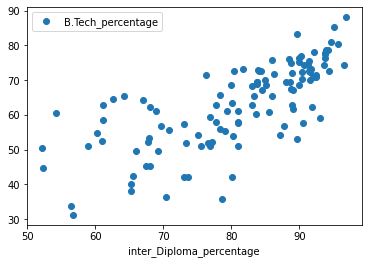

In [ ]:
stu_data.plot(x='inter_Diploma_percentage',y='B.Tech_percentage',style='o')

### From the above graph, it is obvious that this is a possitive correlation between Intermediate and B.Tech percentage. 
+ve correlation: As, X increases, Y also increases

## 3) Now, convert the data into form understandable to machine learning model

    Note that, the column values are in the form of series. But a model expect the values in the form of numpy array. So, we should convert the data into [n,1] array( n rows and 1 column )
    
    Now trying to reshape with (-1, 1) . We have provided column as 1 but rows as unknown . So we get result new shape as 2 dimentions.

In [ ]:
x=stu_data["inter_Diploma_percentage"].values.reshape(-1,1)
y=stu_data["B.Tech_percentage"].values.reshape(-1,1)

In [ ]:
print(x.shape)
print(y.shape)

(117, 1)
(117, 1)


## 4) Divide the data into train and test

In [ ]:
# Now divide the data into train and test. Here we are keeping 20% as our test set
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=3)

# random state controls the shuffling applied to the data before applying the split. 

In [ ]:
# Printing X_train,X_test,Y_train,Y_test
print("X_train- Training data (features) size is ",X_train.shape)
print("X_test- Test data (features) size is ",X_test.shape)
print("Y_train- Training data (labels) size is ",Y_train.shape)
print("Y_test- Test data (labels) size is ",Y_test.shape)

X_train- Training data (features) size is  (93, 1)
X_test- Test data (features) size is  (24, 1)
Y_train- Training data (labels) size is  (93, 1)
Y_test- Test data (labels) size is  (24, 1)


## 5) Apply the model on training dataset

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train) 
# Using "fit" function data is given as input to the linear regressor and model is buit (m and c is calculated).

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 6) Get the parameters

### In y=mx+c, we know that c is intercept and m is slope.

In [ ]:
print(model.intercept_)  # This is our 'intercept'

[1.27382373]


In [ ]:
print(model.coef_) # This is our 'slope'

[[0.76231957]]


## 7) Now we apply the model on testset.

In [ ]:
predicted_btech=model.predict(X_test) # Predict the weights of people in based on their heights
predicted_btech

array([[69.04403358],
       [53.11155455],
       [44.34487948],
       [52.73039476],
       [50.21474018],
       [62.56431723],
       [70.94983251],
       [60.96344613],
       [64.79791357],
       [53.03532259],
       [65.15620377],
       [72.85563143],
       [69.80635315],
       [65.38489964],
       [70.18751294],
       [61.192142  ],
       [51.20575562],
       [47.24169385],
       [56.9231524 ],
       [57.22808023],
       [61.03967809],
       [46.25067841],
       [65.61359551],
       [66.83330682]])

## 8) Let's keep predicted B.Tech marks and Actual B.tech marks for better readability

In [ ]:
#  flatten() function is used to get a copy of an given array collapsed into one dimension. 
Actual_predicted=pd.DataFrame({'predicted':predicted_btech.flatten(), 'Actual':Y_test.flatten()})
Actual_predicted

,predicted,Actual
0,69.044034,63.00
1,53.111555,62.20
2,44.344879,33.77
3,52.730395,45.45
4,50.214740,65.46
5,62.564317,72.73
6,70.949833,72.74
7,60.963446,55.82
8,64.797914,65.53
9,53.035323,53.26


## 9) Let's see the performance of model visually
Red points are actual B.tech score of students. And Blue line is model's approximation of B.tech percentage based on intermediate percentage 

Text(0, 0.5, 'B.Tech')

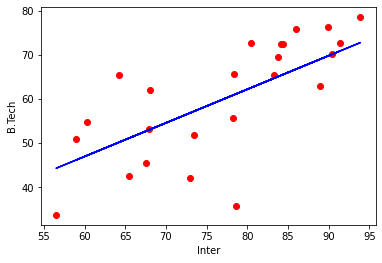

In [ ]:
plt.scatter(X_test,Y_test,color='red') # Original values are plotted in red
plt.plot(X_test,predicted_btech, color='blue') # Predicted values are plotted in blue
plt.xlabel("Inter") # Name of X-axis
plt.ylabel("B.Tech") # Name of Y-axis

## 10) Check the performance of the model

In [ ]:
print('Mean absolute error:',metrics.mean_absolute_error(Y_test, predicted_btech))
print('Mean squared error:',metrics.mean_squared_error(Y_test, predicted_btech))
print("R square",metrics.r2_score(Y_test, predicted_btech))
print('Root Mean squared error:',np.sqrt(metrics.mean_squared_error(Y_test, predicted_btech)))

Mean absolute error: 7.384110415728863
Mean squared error: 82.97454278530192
R square 0.5197791413548358
Root Mean squared error: 9.109036325830626


## 11) Say a student got 95% in Intermediate. How much B.Tech percentage he/she scores in B.Tech?

In [ ]:
a=np.array(95) # Let's predict the weight of a person given his height as 188 cm
print(model.predict(a.reshape(1, -1)))

[[73.69418296]]


## So, he/she may score approximately 74% in B.Tech 
(Note the answer may vary because of random picking of rows in train and test set)